In [1]:
import pandas as pd

happiness = 'Happiness_report.csv'

happiness = pd.read_csv(happiness)

print("Happiness")
print(happiness.head())

Happiness
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2      

In [2]:
mexico = happiness[happiness['Country or region'] == 'Mexico']

mexico.set_index('Country or region', inplace=True)

print(mexico.head())

mexico.to_csv('happiness_mexico.csv')


                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


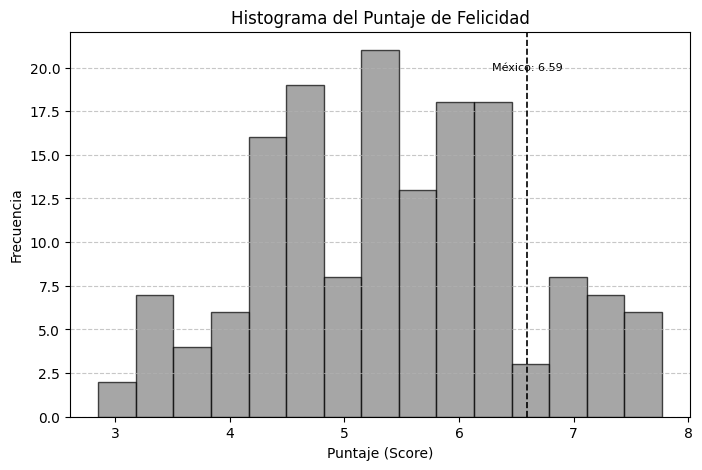

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Happiness_report.csv'
happiness = pd.read_csv(file_path)

mexico = happiness[happiness['Country or region'] == 'Mexico']

plt.figure(figsize=(8, 5))
plt.hist(happiness['Score'], bins=15, color='grey', edgecolor='black', alpha=0.7)
plt.title('Histograma del Puntaje de Felicidad', fontsize=12)
plt.xlabel('Puntaje (Score)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)

mexico_score = mexico['Score'].values[0]
plt.axvline(mexico_score, color='black', linestyle='--', linewidth=1.2, label=f'México: {mexico_score}')
plt.text(mexico_score, plt.ylim()[1] * 0.9, f'México: {mexico_score:.2f}', color='black', fontsize=8, ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


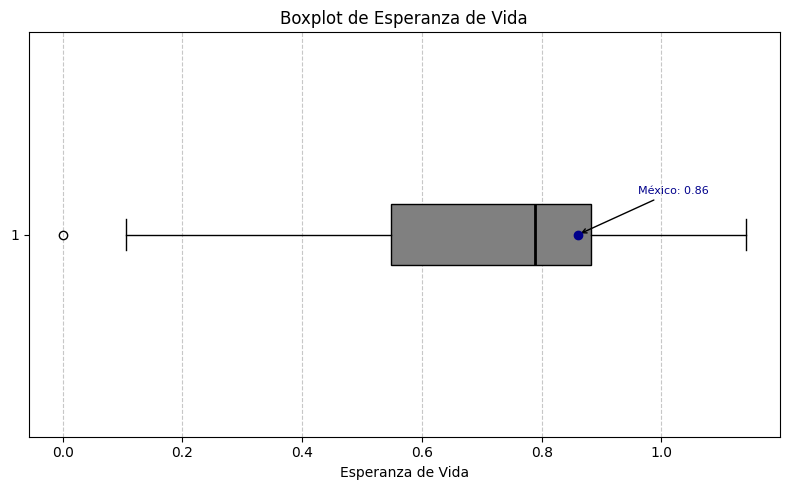

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Happiness_report.csv'
happiness = pd.read_csv(file_path)

mexico = happiness[happiness['Country or region'] == 'Mexico']

plt.figure(figsize=(8, 5))
plt.boxplot(happiness['Healthy life expectancy'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='grey', color='black'),
            medianprops=dict(color='black', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.title('Boxplot de Esperanza de Vida', fontsize=12)
plt.xlabel('Esperanza de Vida', fontsize=10)

mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]
plt.scatter(mexico_life_expectancy, 1, color='darkblue', zorder=5, label=f'México: {mexico_life_expectancy:.2f}')
plt.annotate(f'México: {mexico_life_expectancy:.2f}',
             xy=(mexico_life_expectancy, 1),
             xytext=(mexico_life_expectancy + 0.1, 1.1),
             arrowprops=dict(facecolor='darkblue', arrowstyle='->'),
             fontsize=8, color='darkblue')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


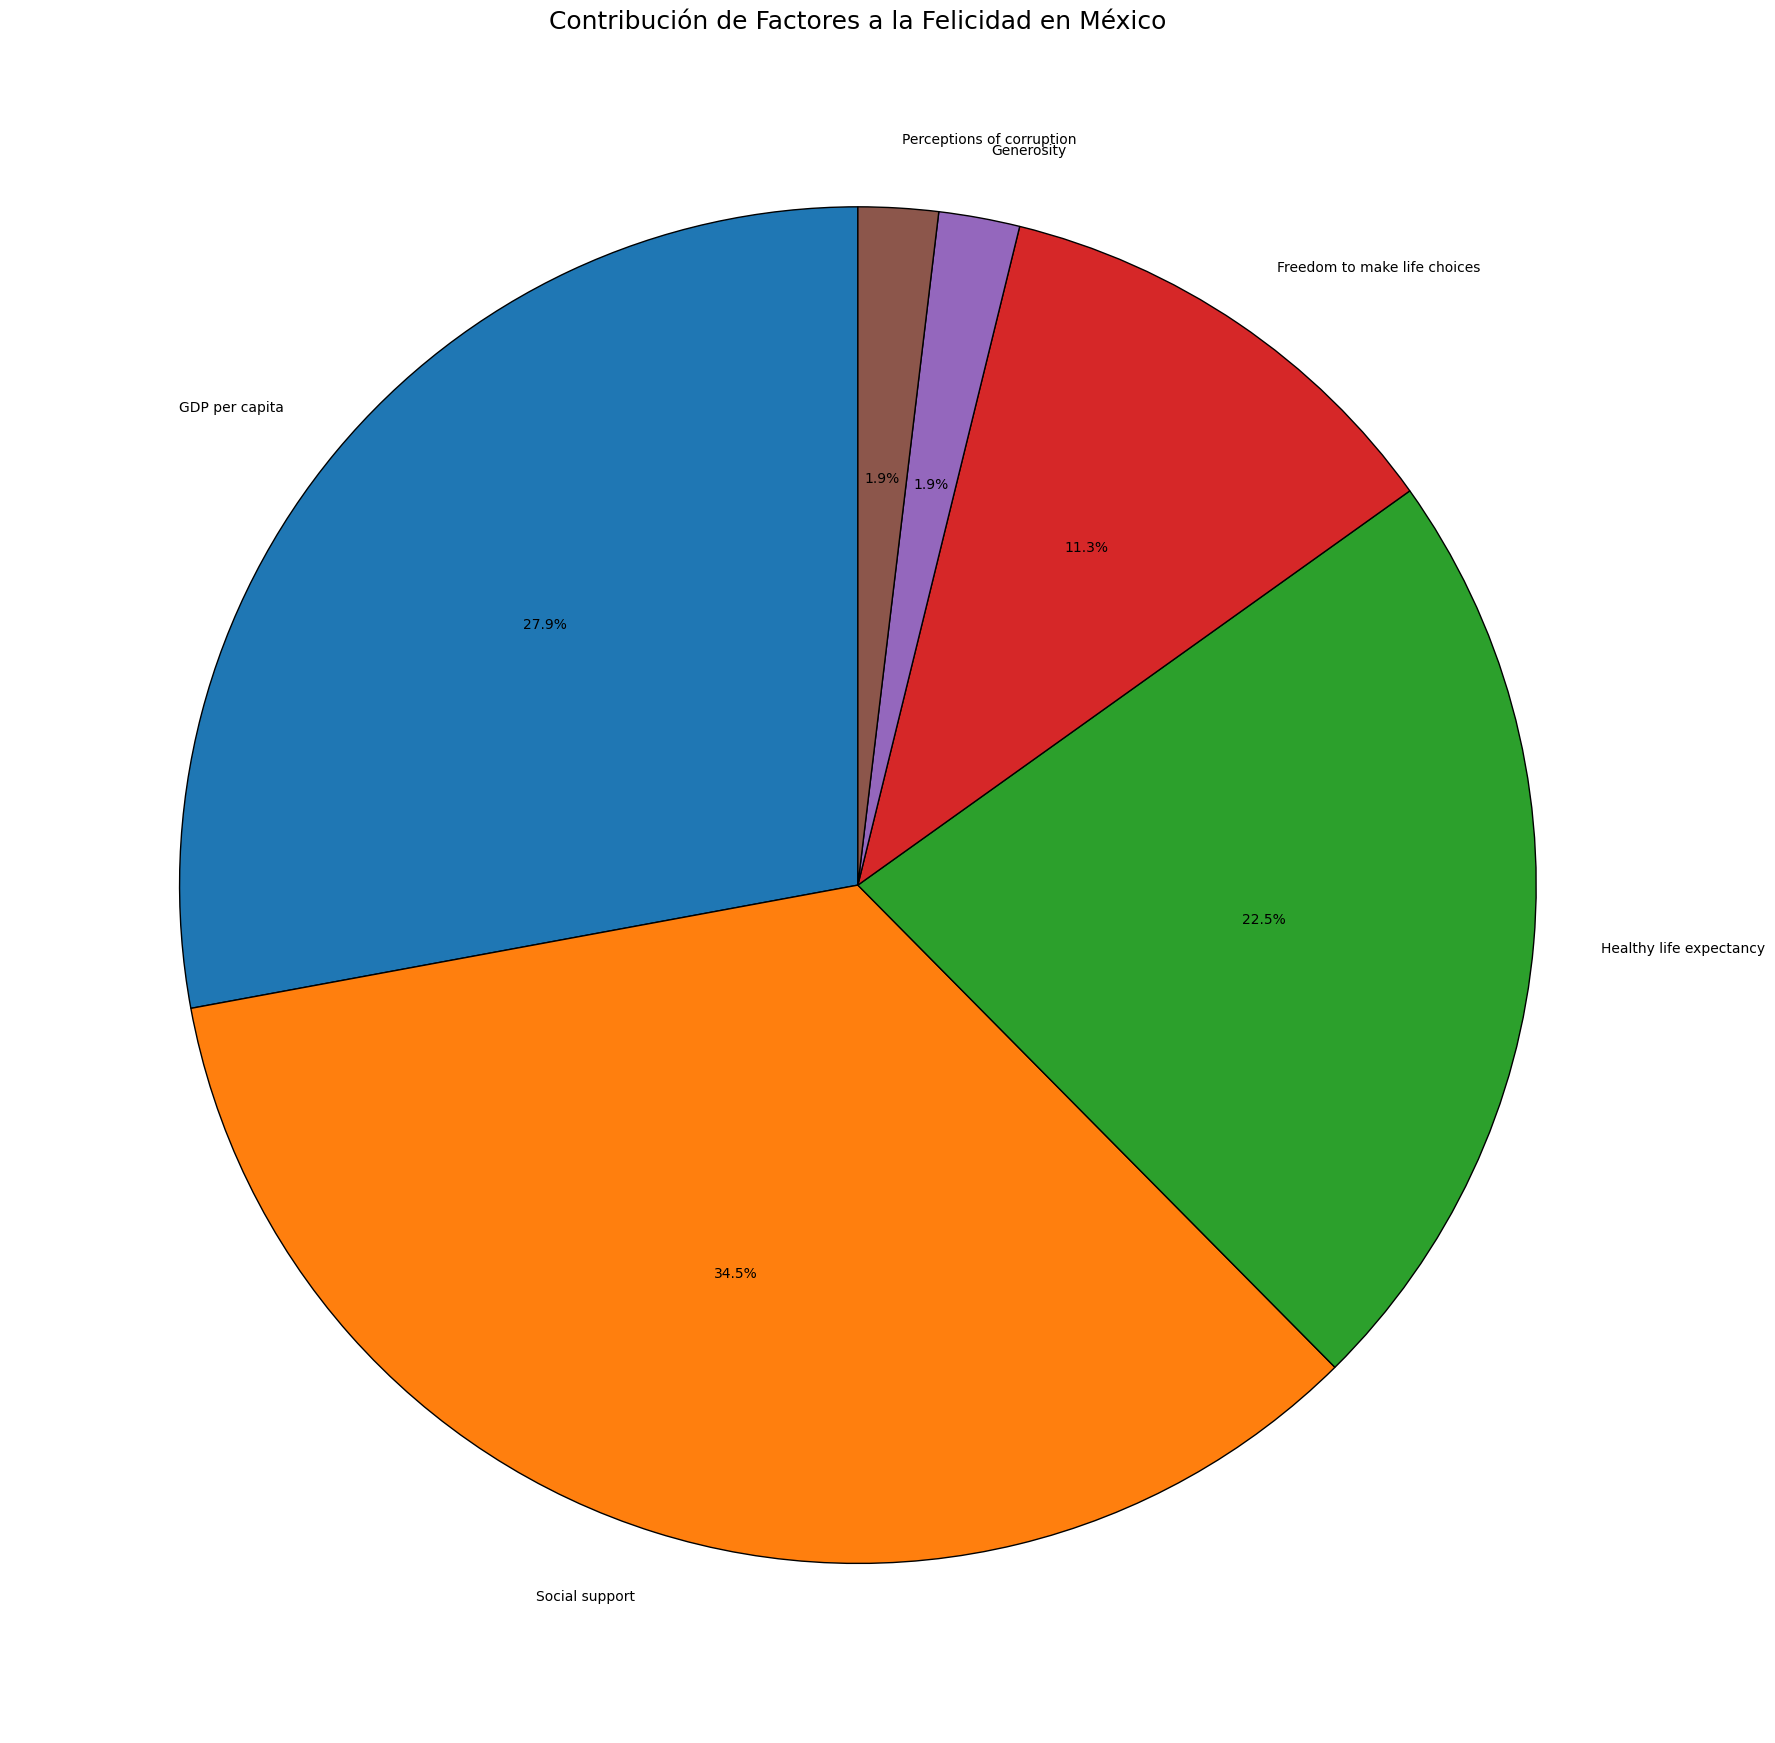

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Happiness_report.csv'
happiness = pd.read_csv(file_path)

mexico = happiness[happiness['Country or region'] == 'Mexico']

factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
contributions = mexico[factors].iloc[0]

plt.figure(figsize=(18, 18))
plt.pie(contributions, labels=factors, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.tab10.colors, wedgeprops={'edgecolor': 'black'})

plt.title('Contribución de Factores a la Felicidad en México', fontsize=18)

plt.tight_layout()
plt.show()


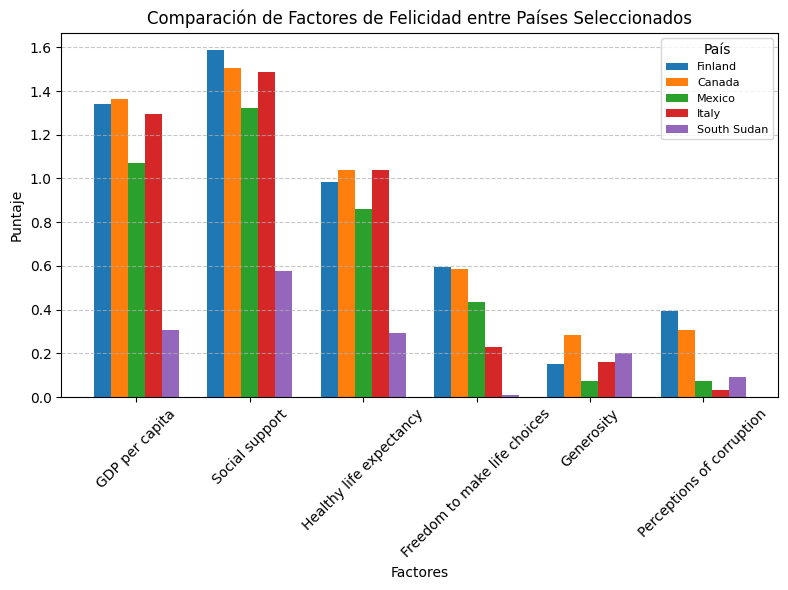

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Happiness_report.csv'
happiness = pd.read_csv(file_path)

selected_countries = ['Finland', 'South Sudan', 'Mexico', 'Canada', 'Italy']
filtered_data = happiness[happiness['Country or region'].isin(selected_countries)]

factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(8, 6))
bar_width = 0.15
x = range(len(factors))

for i, country in enumerate(filtered_data['Country or region']):
    plt.bar(
        [pos + i * bar_width for pos in x],
        filtered_data.loc[filtered_data['Country or region'] == country, factors].values[0],
        width=bar_width,
        label=country
    )

plt.title('Comparación de Factores de Felicidad entre Países Seleccionados', fontsize=12)
plt.xlabel('Factores', fontsize=10)
plt.ylabel('Puntaje', fontsize=10)
plt.xticks([pos + 2 * bar_width for pos in x], factors, fontsize=10, rotation=45)
plt.legend(title='País', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

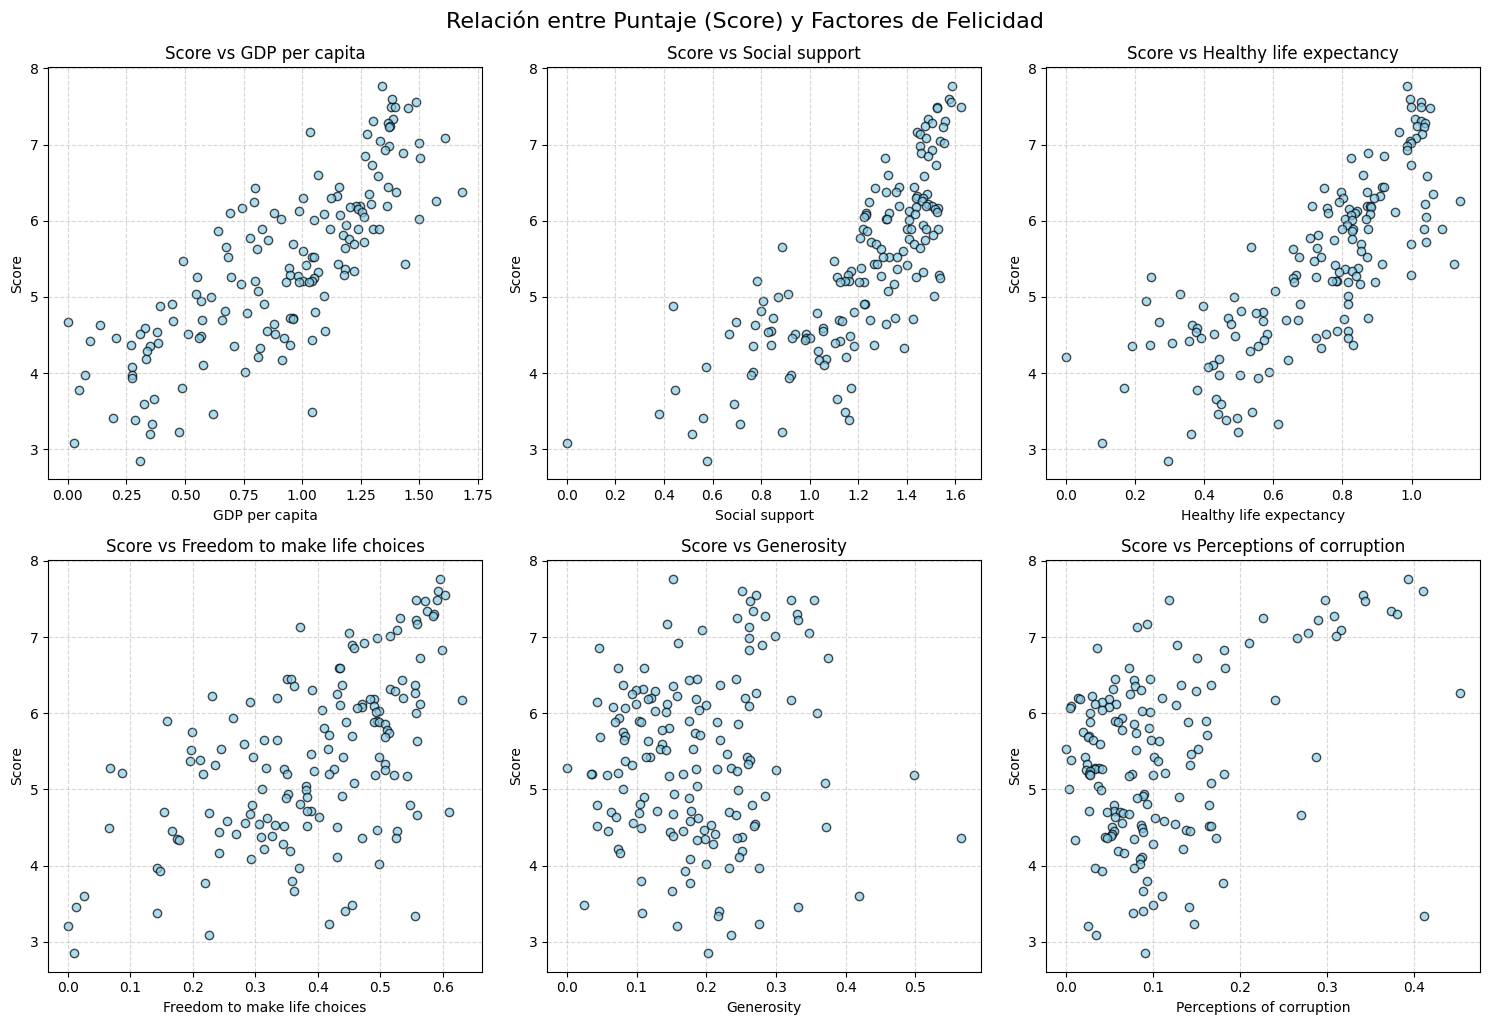

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Happiness_report.csv'
happiness = pd.read_csv(file_path)

factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=False, sharey=False)

for i, factor in enumerate(factors):
    row, col = divmod(i, 3)
    axes[row, col].scatter(happiness[factor], happiness['Score'], alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Score vs {factor}', fontsize=12)
    axes[row, col].set_xlabel(factor, fontsize=10)
    axes[row, col].set_ylabel('Score', fontsize=10)
    axes[row, col].grid(alpha=0.5, linestyle='--')

plt.tight_layout()
plt.suptitle('Relación entre Puntaje (Score) y Factores de Felicidad', fontsize=16, y=1.02)
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Happiness_report.csv'
happiness = pd.read_csv(file_path)

file_path = 'Metadata.csv'
metadata = pd.read_csv(file_path)

print("Columnas en Happiness_report.csv:")
print(happiness.columns)

print("\nColumnas en Metadata.csv:")
print(metadata.columns)

print("\nPrimeras filas de Happiness_report.csv:")
print(happiness.head())

print("\nPrimeras filas de Metadata.csv:")
print(metadata.head())


Columnas en Happiness_report.csv:
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Columnas en Metadata.csv:
Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

Primeras filas de Happiness_report.csv:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986              

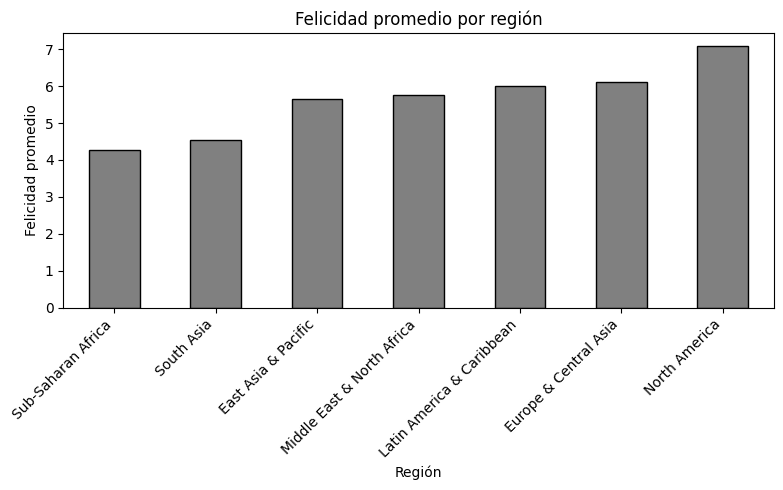

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df = pd.merge(
    happiness.rename(columns={'Country or region': 'Country'}),
    metadata.rename(columns={'TableName': 'Country'}),
    on='Country',
    how='inner'
)

average_happiness_by_region = combined_df.groupby('Region')['Score'].mean()

plt.figure(figsize=(8, 5))
average_happiness_by_region.sort_values().plot(kind='bar', color='grey', edgecolor='black')
plt.title('Felicidad promedio por región', fontsize=12)
plt.ylabel('Felicidad promedio', fontsize=10)
plt.xlabel('Región', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
